In [39]:
import pandas as pd
import numpy as np
import os
import importlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
plt.style.use('default')
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [3]:
text_df = df.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet','Sentiment'], axis=1)
text_df.head()

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."


In [4]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

What are we drinking today @TucanTribe 
@MadBears_ 
@lkinc_algo 
@al_goanna 

#WorldCup2022 https://t.co/Oga3TzvG5h 

Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8 

Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU 

Golden Maknae shinning bright

https://t.co/4AyZbzGTX4
#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK 
@BTS_twt 

If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k 



In [8]:
def data_processing(text):
    text = text.lower()
    

In [9]:
import nltk

In [10]:
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')
STOPWORDS=set(english_stopwords)

In [11]:
def clean_stopwords(text):
  value=' '.join(word for word in text.split() if word not in STOPWORDS)
  return value

In [12]:
text_df['Tweet'] = text_df['Tweet'].apply(lambda x: clean_stopwords(x))

In [13]:
import string
english_punctuations=string.punctuation
print(english_punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
#clearning and removing punctuations
import string
english_punctuations=string.punctuation

punctuation_list=english_punctuations

def cleaning_punctuations(text):
    translator=str.maketrans('', '',punctuation_list)
    return text.translate(translator)

text_df["Tweet"]=text_df["Tweet"].apply(lambda text: cleaning_punctuations(text))

In [15]:
import re
#cleaning and removing repeated charecters:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text)

text_df["Tweet"]=text_df["Tweet"].apply(lambda text: cleaning_repeating_char(text))

In [16]:
#cleaning removing URL from tweet
def cleaning_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)

text_df["Tweet"]=text_df["Tweet"].apply(lambda text: cleaning_url(text))

In [17]:
#clearning and removing numeric numbers
def cleaning_numbers(text):
    return re.sub('[0-9]+', '',text)

text_df["Tweet"]=text_df["Tweet"].apply(lambda text: cleaning_numbers(text))


In [18]:
#word tokenization of tweet
from nltk.tokenize import word_tokenize
text_df["Tweet"]=text_df["Tweet"].apply(word_tokenize)
text_df.head()

,Tweet
0,"[What, drinking, today, TucanTribe, MadBears, ..."
1,"[Amazing, CanadaSoccerEN, WorldCup, launch, vi..."
2,"[Worth, reading, watching, WorldCup, httpstcSQ..."
3,"[Golden, Maknae, shinning, bright, httpstcoAyZ..."
4,"[If, BBC, cares, much, human, rights, homosexu..."


In [19]:
#apply lemmatizer on sentiments.
nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()

def lemmatizer_on_word(text):
    data=[lm.lemmatize(word) for word in text]
    return data
text_df["Tweet"]=text_df["Tweet"].apply(lambda text:lemmatizer_on_word(text))
text_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweet
0,"[What, drinking, today, TucanTribe, MadBears, ..."
1,"[Amazing, CanadaSoccerEN, WorldCup, launch, vi..."
2,"[Worth, reading, watching, WorldCup, httpstcSQ..."
3,"[Golden, Maknae, shinning, bright, httpstcoAyZ..."
4,"[If, BBC, care, much, human, right, homosexual..."


In [20]:
#remove commma and convert tokens into string before fitting to the model (it's depends on model to model)
text_df["Tweet"]=[" ".join(line)for line in text_df["Tweet"]]

In [21]:
text_df.head()

,Tweet
0,What drinking today TucanTribe MadBears lkinca...
1,Amazing CanadaSoccerEN WorldCup launch video S...
2,Worth reading watching WorldCup httpstcSQrNadYU
3,Golden Maknae shinning bright httpstcoAyZbzGTX...
4,If BBC care much human right homosexual right ...


In [23]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [24]:
text_df['polarity'] = text_df['Tweet'].apply(polarity)

In [25]:
text_df.head(5)

,Tweet,polarity
0,What drinking today TucanTribe MadBears lkinca...,0.000000
1,Amazing CanadaSoccerEN WorldCup launch video S...,0.225000
2,Worth reading watching WorldCup httpstcSQrNadYU,0.300000
3,Golden Maknae shinning bright httpstcoAyZbzGTX...,0.500000
4,If BBC care much human right homosexual right ...,0.214286


In [26]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [27]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [28]:
text_df.head()

,Tweet,polarity,sentiment
0,What drinking today TucanTribe MadBears lkinca...,0.000000,Neutral
1,Amazing CanadaSoccerEN WorldCup launch video S...,0.225000,Positive
2,Worth reading watching WorldCup httpstcSQrNadYU,0.300000,Positive
3,Golden Maknae shinning bright httpstcoAyZbzGTX...,0.500000,Positive
4,If BBC care much human right homosexual right ...,0.214286,Positive


<Axes: xlabel='sentiment', ylabel='count'>

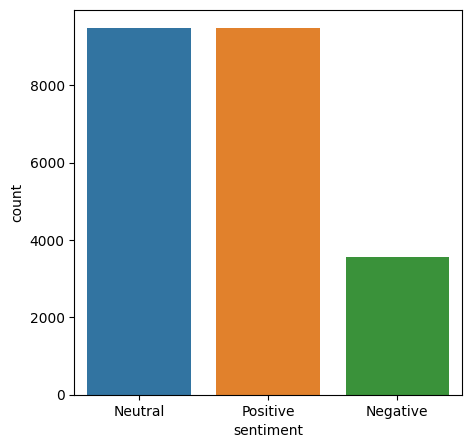

In [29]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

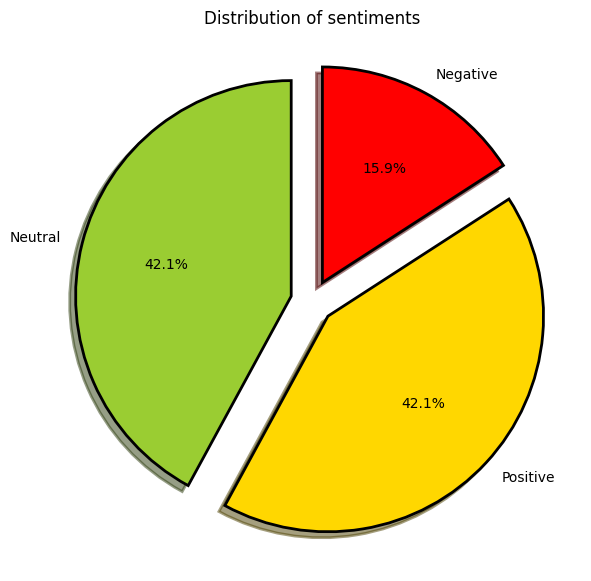

In [30]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Tweet'])

In [35]:
X = text_df['Tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (18019, 180704)
Size of y_train: (18019,)
Size of x_test: (4505, 180704)
Size of y_test: (4505,)


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.06%


In [41]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 470  167   75]
 [  11 1878   25]
 [  48  167 1664]]


              precision    recall  f1-score   support

    Negative       0.89      0.66      0.76       712
     Neutral       0.85      0.98      0.91      1914
    Positive       0.94      0.89      0.91      1879

    accuracy                           0.89      4505
   macro avg       0.89      0.84      0.86      4505
weighted avg       0.89      0.89      0.89      4505



In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [44]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [45]:
y_pred = grid.predict(x_test)

In [46]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.08%


In [47]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 500  136   76]
 [  11 1876   27]
 [  48  149 1682]]


              precision    recall  f1-score   support

    Negative       0.89      0.70      0.79       712
     Neutral       0.87      0.98      0.92      1914
    Positive       0.94      0.90      0.92      1879

    accuracy                           0.90      4505
   macro avg       0.90      0.86      0.88      4505
weighted avg       0.90      0.90      0.90      4505



In [48]:
from sklearn.svm import LinearSVC

In [49]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [50]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 91.12%


In [51]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 527  116   69]
 [  11 1879   24]
 [  45  135 1699]]


              precision    recall  f1-score   support

    Negative       0.90      0.74      0.81       712
     Neutral       0.88      0.98      0.93      1914
    Positive       0.95      0.90      0.93      1879

    accuracy                           0.91      4505
   macro avg       0.91      0.88      0.89      4505
weighted avg       0.91      0.91      0.91      4505



In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
model_pred = model.predict(x_test)
model_acc = accuracy_score(model_pred, y_test)
print("test accuracy: {:.2f}%".format(model_acc*100))

test accuracy: 92.81%


In [55]:
print(confusion_matrix(y_test, model_pred))
print("\n")
print(classification_report(y_test, model_pred))

[[ 555   53  104]
 [  15 1877   22]
 [  72   58 1749]]


              precision    recall  f1-score   support

    Negative       0.86      0.78      0.82       712
     Neutral       0.94      0.98      0.96      1914
    Positive       0.93      0.93      0.93      1879

    accuracy                           0.93      4505
   macro avg       0.91      0.90      0.90      4505
weighted avg       0.93      0.93      0.93      4505

